In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite("ggbio")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘ggbio’
also installing the dependencies ‘graph’, ‘RBGL’, ‘reshape’, ‘OrganismDbi’, ‘GGally’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'BH', 'bindr', 'bindrcpp', 'bit', 'blob', 'broom', 'callr',
  'caret', 'checkpoint', 'cluster', 'curl', 'CVST', 'data.table', 'DBI',
  'dbplyr', 'ddalpha', 'digest', 'doBy', 'doParallel', 'dplyr', 'DRR',
  'forcats', 'foreach', 'foreign', 'glmnet', 'haven', 'hexbin', 'hms',
  'htmlwidgets', 'httpuv', 'IRdisplay', 'iterators', 'jsonlite', 'kernlab',
  'knitr', 'lava', 'lubridate', 'maps', 'MASS', 'Matrix', 'mgcv', 'modelr',
  'nlme', 'openssl', 'pbdZMQ', 'pillar', 'plogr', 'png', 'prod

In [13]:
library(ggbio)

In [31]:
library("GenomicAlignments")
library(rtracklayer)
library(GenomicFeatures)
library(rtracklayer)
library(Rsamtools)
library(VariantAnnotation)


Attaching package: 'VariantAnnotation'

The following object is masked from 'package:base':

    tabulate



In [5]:
setwd("/home/kap12/ggbio_autoplot_notebook/data")

### Visualize gapped bam alignments

In [23]:
bam.sub <- readGAlignments(file = "SRR064167.fastq.bam",use.names = TRUE, param=ScanBamParam(which=GRanges("Chr5", IRanges(4000, 8000))))
bam.sub

GAlignments object with 2279 alignments and 0 metadata columns:
                    seqnames strand       cigar    qwidth     start       end
                       <Rle>  <Rle> <character> <integer> <integer> <integer>
  SRR064167.4123621     Chr5      +         38M        38      3963      4000
  SRR064167.6144718     Chr5      +         38M        38      3963      4000
  SRR064167.5313955     Chr5      -         38M        38      3963      4000
  SRR064167.7922827     Chr5      -         38M        38      3963      4000
  SRR064167.1226413     Chr5      +         38M        38      3965      4002
                ...      ...    ...         ...       ...       ...       ...
   SRR064167.679255     Chr5      +         38M        38      7996      8033
  SRR064167.7189521     Chr5      -         38M        38      7996      8033
  SRR064167.5805011     Chr5      +         38M        38      7998      8035
  SRR064167.8576387     Chr5      +         38M        38      7998      8035


#### Using autoplot function
* Gusses what type of plot you from the data
* figures out the x and y cordinate

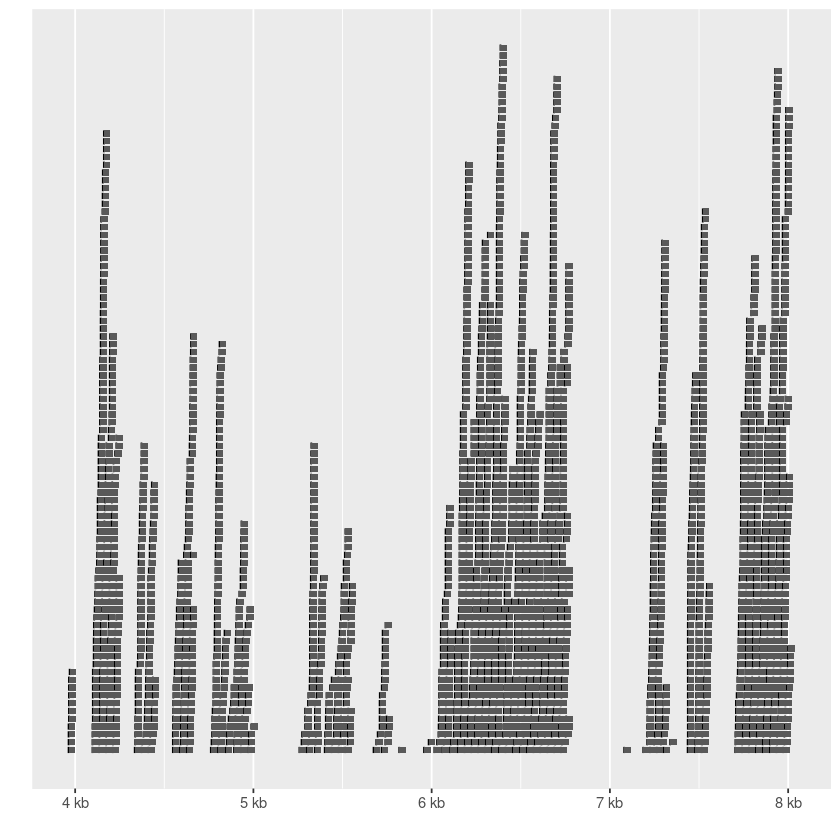

In [24]:
autoplot(bam.sub)

extracting information...
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


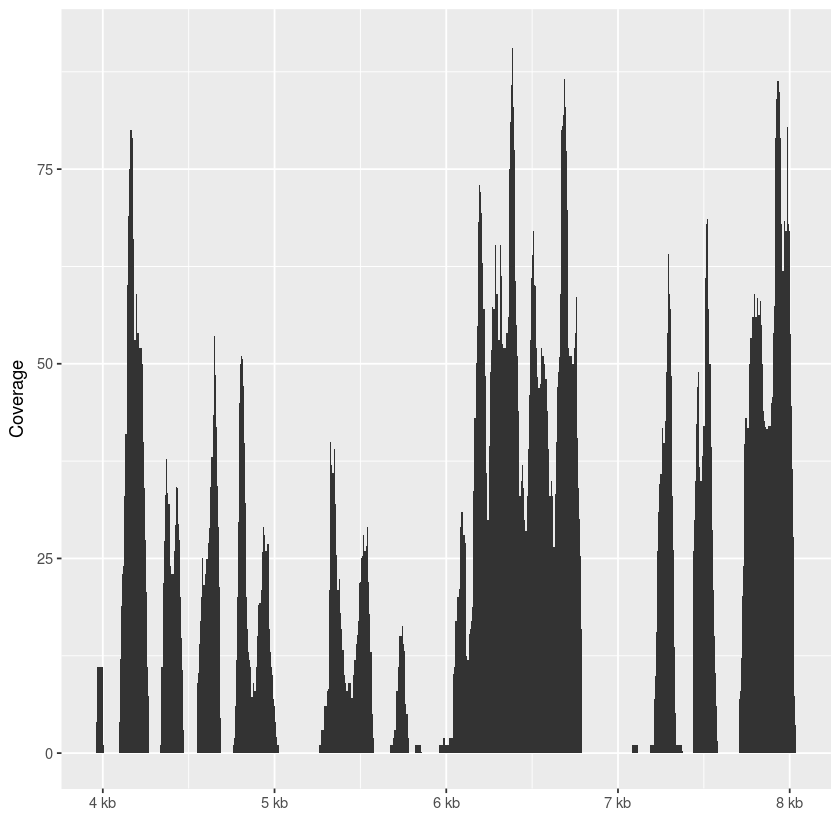

In [25]:
autoplot(bam.sub,stat="coverage")

### plotting a gene structure

In [28]:
txdb <- makeTxDbFromGFF(file="TAIR10_GFF3_trunc.gff", format="gff3")

Import genomic features from the file as a GRanges object ... Warning message in .local(con, format, text, ...):
"gff-version directive indicates version is 1, not 3"OK
Prepare the 'metadata' data frame ... OK
Make the TxDb object ... Warning message in .extract_exons_from_GRanges(exon_IDX, gr, ID, Name, Parent, feature = "exon", :
"The following orphan exon were dropped (showing only the 6 first):
  seqid start   end strand   ID      Parent Name
1  Chr2 10478 12861      - <NA> AT2G01022.1 <NA>
2  Chr2 14395 16377      - <NA> AT2G01024.1 <NA>
3  Chr2 17624 22540      - <NA> AT2G01026.1 <NA>
4  Chr2 23971 26923      - <NA> AT2G01028.1 <NA>
5  Chr2 28465 38652      + <NA> AT2G01029.1 <NA>
6  Chr2 39867 40358      - <NA> AT2G01031.1 <NA>"Warning message in .extract_exons_from_GRanges(cds_IDX, gr, ID, Name, Parent, feature = "cds", :
"The following orphan CDS were dropped (showing only the 6 first):
  seqid start  end strand   ID              Parent Name
1  Chr1  3760 3913      + <NA> AT1G

Parsing transcripts...
Parsing exons...
Parsing cds...
Parsing utrs...
------exons...
------cdss...
------introns...
------utr...
aggregating...
Done
Constructing graphics...


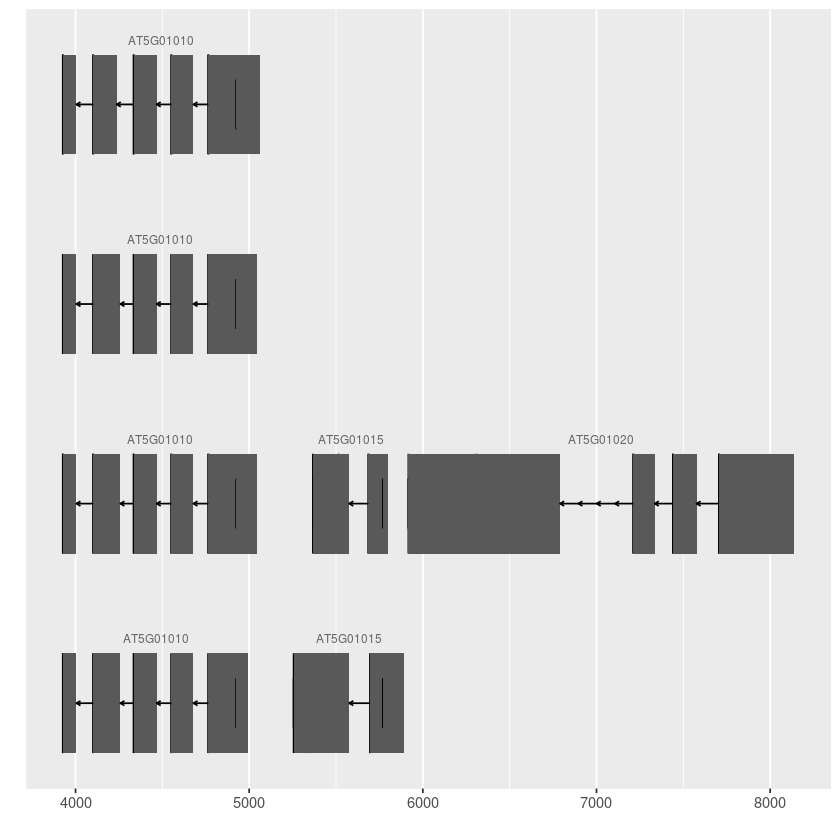

In [29]:
autoplot(txdb, which=GRanges("Chr5", IRanges(4000, 8000)), names.expr = "gene_id")

### Plotting a variant file VCF file

In [32]:
vcf <- readVcf(file="varianttools_gnsap.vcf", genome="ATH1")
vcf

class: CollapsedVCF 
dim: 23 1 
rowRanges(vcf):
  GRanges with 5 metadata columns: paramRangeID, REF, ALT, QUAL, FILTER
info(vcf):
  DataFrame with 0 columns: 
geno(vcf):
  SimpleList of length 18: AD, DP, FT, n.read.pos, n.read.pos.ref, raw.cou...
geno(header(vcf)):
                     Number Type    Description                                
   AD                2      Integer Allelic depths (number of reads in each ...
   DP                1      Integer Total read depth                           
   FT                1      String  Variant filters                            
   n.read.pos        1      Integer                                            
   n.read.pos.ref    1      Integer                                            
   raw.count         1      Integer                                            
   raw.count.ref     1      Integer                                            
   raw.count.total   1      Integer                                            
   mean.qual

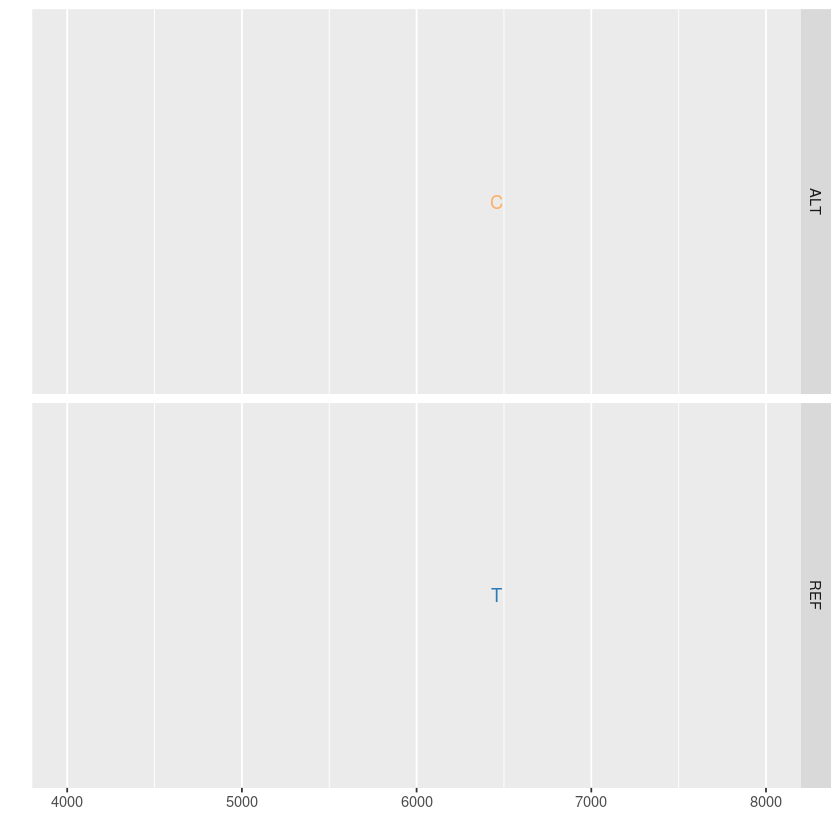

In [33]:
autoplot(vcf[seqnames(vcf)=="Chr5"], type = "fixed") + xlim(4000, 8000) + theme(legend.position = "none", axis.text.y = element_blank(), axis.ticks.y=element_blank())

### visualize all in layered tracks 

extracting information...
extracting information...
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Import genomic features from the file as a GRanges object ... Warning message in .local(con, format, text, ...):
"gff-version directive indicates version is 1, not 3"OK
Prepare the 'metadata' data frame ... OK
Make the TxDb object ... Warning message in .extract_exons_from_GRanges(exon_IDX, gr, ID, Name, Parent, feature = "exon", :
"The following orphan exon were dropped (showing only the 6 first):
  seqid start   end strand   ID      Parent Name
1  Chr2 10478 12861      - <NA> AT2G01022.1 <NA>
2  Chr2 14395 16377      - <NA> AT2G01024.1 <NA>
3  Chr2 17624 22540      - <NA> AT2G01026.1 <NA>
4  Chr2 23971 26923      - <NA> AT2G01028.1 <NA>
5  Chr2 28465 38652      + <NA> AT2G01029.1 <NA>
6  Chr2 39867 40358      - <NA> AT2G01031.1 <NA>"Warning message in .extract_exons_from_GRanges(cds_IDX, gr, ID, Name, Parent, feature = "cds", :
"Th

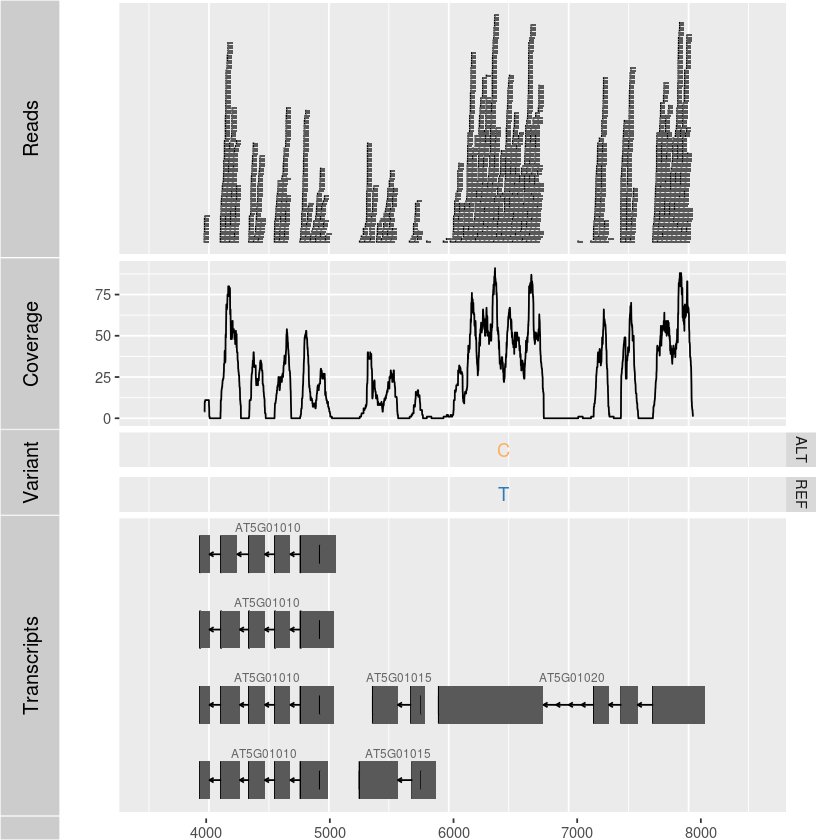

In [34]:
ga <- readGAlignments("SRR064167.fastq.bam", use.names=TRUE, param=ScanBamParam(which=GRanges("Chr5", IRanges(4000, 8000))))
p1 <- autoplot(ga, geom = "rect")
p2 <- autoplot(ga, geom = "line", stat = "coverage")
vcf <- readVcf(file="varianttools_gnsap.vcf", genome="ATH1")
p3 <- autoplot(vcf[seqnames(vcf)=="Chr5"], type = "fixed") + xlim(4000, 8000) + theme(legend.position = "none", axis.text.y = element_blank(), axis.ticks.y=element_blank())
txdb <- makeTxDbFromGFF(file="TAIR10_GFF3_trunc.gff", format="gff3")
p4 <- autoplot(txdb, which=GRanges("Chr5", IRanges(4000, 8000)), names.expr = "gene_id")
tracks(Reads=p1, Coverage=p2, Variant=p3, Transcripts=p4, heights = c(0.3, 0.2, 0.1, 0.35)) + ylab("")